# ***Dancing to the Top: An Analysis of Danceability in K-Pop Music*** 

## *Feature Information*

K-pop is a genre of popular music originating in South Korea, characterized by a mix of musical elements such as catchy melodies, electronic beats, and incorporation of traditional Korean music. Dance is an important aspect of K-pop music, with many K-pop groups known for their synchronized and complex choreography. K-pop dance routines are frequently featured in music videos, live performances, and televised competitions. The project analyzes K-pop songs based on various features such as:

1. SongID: Unique song identifier.
    
2. Title: Song name.
    
3. Artist: Artist or group name.
    
4. Danceability: A measure of dance suitability.
    
5. Energy: Music intensity.
    
6. Key: Tonality of the song.
    
7. Loudness: Overall volume.
    
8. Mode: Major or minor key.
    
9. Speechiness: Spoken word presence.
    
10. Acousticness: Acoustic elements.
    
11. Valence: Musical positivity.
    
12. Tempo: Song speed in BPM.
    
13. Duration_ms: Song length in milliseconds.
    
14. Time_signature: Beats per bar representation.
    
The target feature is "danceability_class", which is derived from the "danceability" feature and is categorized into three classes: "Low", "Medium", and "High".

## *Importing Libraries*

In [1]:
#importing necessary librarise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#if any warnings to ignore it 
import warnings 
warnings.filterwarnings('ignore')

## *Reading Dataset*

In [3]:
#read dataset using pandas and print first 10 records of dataset
kpop=pd.read_csv('KpopHits.csv')
kpop.head(10)

,songID,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
0,1,OMG,NewJeans,0.764,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402,4
1,2,Hype Boy,NewJeans,0.852,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701,4
2,3,That That,Psy and Suga,0.765,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149,4
3,4,Love Dive,IVE,0.673,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299,4
4,5,Run BTS,BTS,0.788,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758,4
5,6,Antifragile,LE SSERAFIM,0.843,0.856,4,-5.318,1,0.0398,0.19700,0.548,120.99,176991,4
6,7,Wa Da Da,Kep1er,0.794,0.894,9,-3.356,1,0.0562,0.08990,0.743,128.01,202763,4
7,8,Typa Girl,BLACKPINK,0.769,0.950,10,-1.951,0,0.1070,0.01060,0.867,123.99,218152,4
8,9,Hot,SEVENTEEN,0.806,0.934,5,-3.191,1,0.0638,0.00613,0.742,126.99,213386,4
9,10,Dice,NMIXX,0.824,0.891,11,-3.276,1,0.0869,0.01680,0.782,120.99,214840,4


In [4]:
# Define the target variable
kpop['danceability_class'] = pd.cut(kpop['danceability'], bins=[0, 0.5, 0.8, 1.0], labels=['Low', 'Medium', 'High'])
kpop.head(10)

,songID,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature,danceability_class
0,1,OMG,NewJeans,0.764,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402,4,Medium
1,2,Hype Boy,NewJeans,0.852,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701,4,High
2,3,That That,Psy and Suga,0.765,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149,4,Medium
3,4,Love Dive,IVE,0.673,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299,4,Medium
4,5,Run BTS,BTS,0.788,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758,4,Medium
5,6,Antifragile,LE SSERAFIM,0.843,0.856,4,-5.318,1,0.0398,0.19700,0.548,120.99,176991,4,High
6,7,Wa Da Da,Kep1er,0.794,0.894,9,-3.356,1,0.0562,0.08990,0.743,128.01,202763,4,Medium
7,8,Typa Girl,BLACKPINK,0.769,0.950,10,-1.951,0,0.1070,0.01060,0.867,123.99,218152,4,Medium
8,9,Hot,SEVENTEEN,0.806,0.934,5,-3.191,1,0.0638,0.00613,0.742,126.99,213386,4,High
9,10,Dice,NMIXX,0.824,0.891,11,-3.276,1,0.0869,0.01680,0.782,120.99,214840,4,High


This code creates a new column in the dataframe called "danceability_class." It categorizes values from the "danceability" column into specific ranges defined by the "bins" parameter, like [0, 0.5], [0.5, 0.8], [0.8, 1.0]. Each range is labeled as 'Low', 'Medium', or 'High,' and the values in the "danceability" column are assigned these labels based on the range they fall into.

In [5]:
#information about dataset like no of rows, no of columns, data-type and non-null values counts.
kpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   songID              595 non-null    int64   
 1   title               595 non-null    object  
 2   artist              595 non-null    object  
 3   danceability        595 non-null    float64 
 4   energy              595 non-null    float64 
 5   key                 595 non-null    int64   
 6   loudness            595 non-null    float64 
 7   mode                595 non-null    int64   
 8   speechiness         595 non-null    float64 
 9   acousticness        595 non-null    float64 
 10  valence             595 non-null    float64 
 11  tempo               595 non-null    float64 
 12  duration_ms         595 non-null    int64   
 13  time_signature      595 non-null    int64   
 14  danceability_class  595 non-null    category
dtypes: category(1), float64(7), int64(5), ob

In [6]:
#displaying summary statistics like count, mean, min, max, std, etc of the numerical columns
kpop.describe()

,songID,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,298.000000,0.668101,0.752534,5.552941,-4.479953,0.573109,0.083380,0.205902,0.564126,122.325108,216114.959664,3.988235
std,171.905982,0.127076,0.173034,3.591301,2.476073,0.495042,0.066649,0.239124,0.216644,24.605154,29774.538359,0.135572
min,1.000000,0.219000,0.070300,0.000000,-17.327000,0.000000,0.025200,0.000219,0.042600,61.450000,145334.000000,3.000000
25%,149.500000,0.598500,0.667000,2.000000,-5.492500,0.000000,0.039750,0.031500,0.400500,104.482000,196858.500000,4.000000
50%,298.000000,0.692000,0.807000,6.000000,-4.081000,1.000000,0.059200,0.098100,0.582000,123.041000,210893.000000,4.000000
75%,446.500000,0.756000,0.880000,9.000000,-2.920000,1.000000,0.096700,0.304000,0.729000,134.819500,229240.000000,4.000000
max,595.000000,0.962000,0.991000,11.000000,-0.384000,1.000000,0.444000,0.990000,0.970000,208.064000,411713.000000,5.000000


The describe() method provides statistics about numeric columns in the dataset, such as mean, median, range, and missing values count, which is useful for exploring and understanding the dataset.

In [7]:
#display the shape(no of rows and columns) of the dataset
kpop.shape

(595, 15)

In [8]:
#display the size(total no of rows x columns) of the dataset
kpop.size

8925

In [9]:
#display value counts of first 5 records from artist column
kpop['artist'].value_counts()[:5]

BTS           17
TWICE         17
Red Velvet    12
BIGBANG       11
BLACKPINK     10
Name: artist, dtype: int64

In [10]:
#display value counts of records from danceability_class column
kpop["danceability_class"].value_counts()

Medium    452
High       76
Low        67
Name: danceability_class, dtype: int64

## *Cleaning Dataset*

In [11]:
#display total values present in each column with count
kpop.count()

songID                595
title                 595
artist                595
danceability          595
energy                595
key                   595
loudness              595
mode                  595
speechiness           595
acousticness          595
valence               595
tempo                 595
duration_ms           595
time_signature        595
danceability_class    595
dtype: int64

In [12]:
#to check duplicate values present in dataset
kpop_duplicate_val=kpop[kpop.duplicated()]
kpop_duplicate_val.count()

songID                0
title                 0
artist                0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
valence               0
tempo                 0
duration_ms           0
time_signature        0
danceability_class    0
dtype: int64

In [13]:
#to check null value present in dataset
kpop_null_val=kpop[kpop.isnull()]
kpop_null_val.count()

songID                0
title                 0
artist                0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
valence               0
tempo                 0
duration_ms           0
time_signature        0
danceability_class    0
dtype: int64

## *Boxplot*

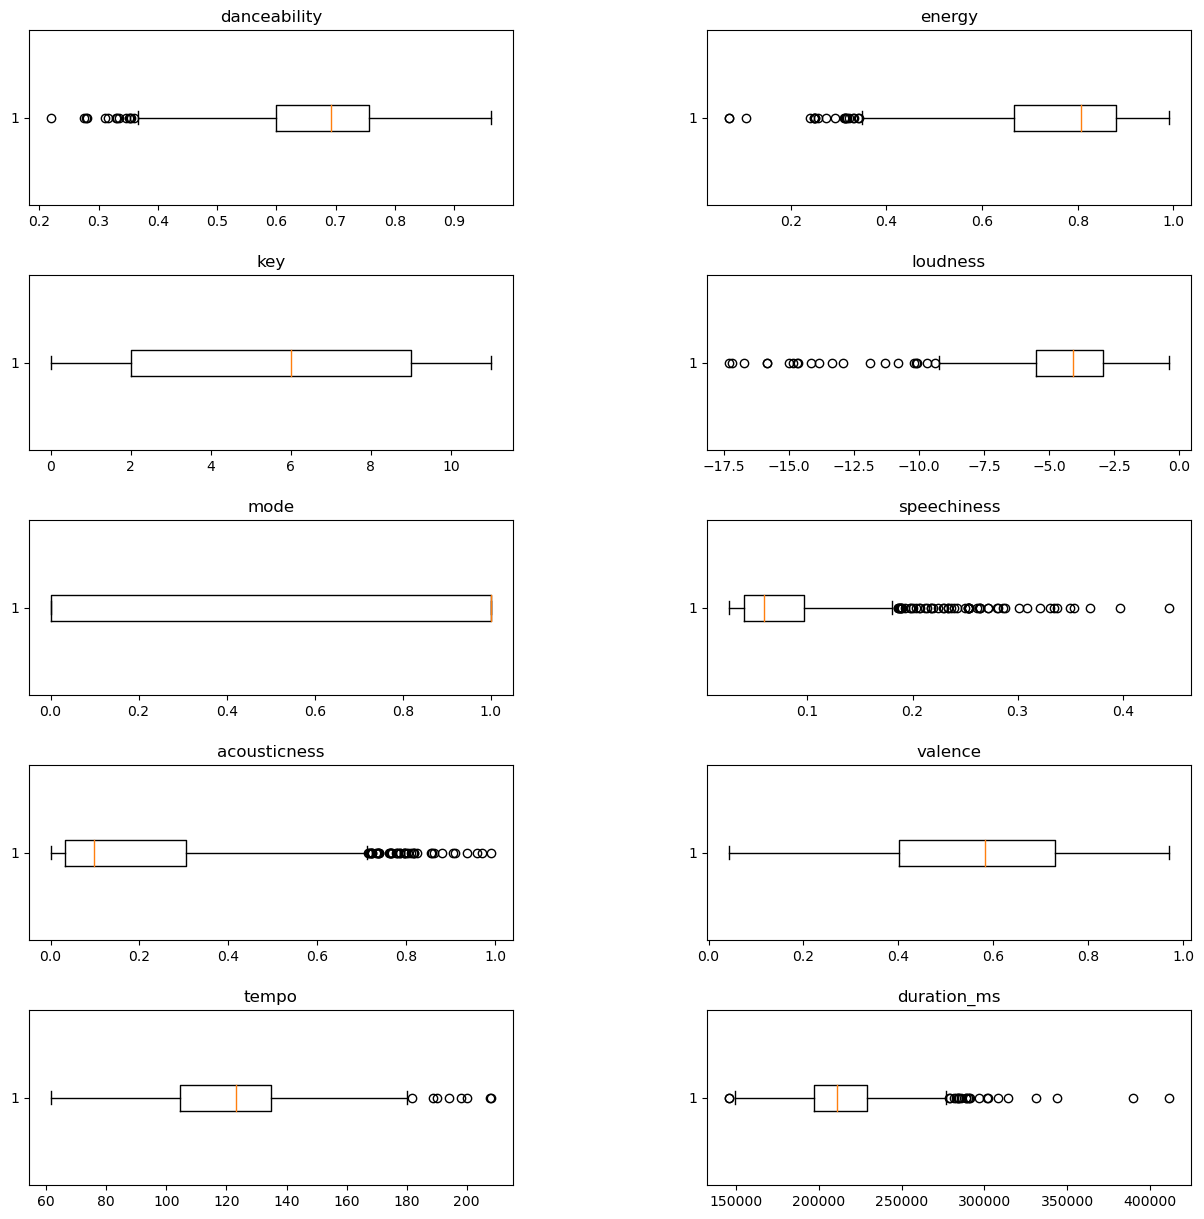

In [14]:
# create a list of column names to plot
columns_to_plot = list(kpop.columns[3:13])

# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.ravel()

# loop through each column and create a boxplot
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(kpop[column], vert=False)
    axes[i].set_title(column)

# adjust the layout of the subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# display the plots
plt.show()

The code creates boxplots for specific columns in the kpop dataset to show data distribution and identify outliers or patterns. The boxplots display the range, median, and quartiles of the data, with outliers as individual points.

## *Exploratory Data Analysis*

In [15]:
#finds the correlation of each column in a dataframe
kpop.corr().where(np.tril(np.ones(kpop.corr().shape)).astype(bool)).replace(np.nan,' ')

,songID,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
songID,1.000000,,,,,,,,,,,
danceability,-0.187757,1.0,,,,,,,,,,
energy,-0.229840,0.374983,1.0,,,,,,,,,
key,0.024512,-0.00591,0.01181,1.0,,,,,,,,
loudness,-0.275632,0.248564,0.747801,0.004842,1.0,,,,,,,
mode,0.063462,-0.142434,-0.220344,-0.148245,-0.158674,1.0,,,,,,
speechiness,-0.087958,0.070809,0.221412,0.032672,0.11241,-0.075674,1.0,,,,,
acousticness,0.281423,-0.443556,-0.710827,0.022855,-0.46993,0.209474,-0.161313,1.0,,,,
valence,-0.079011,0.568533,0.519506,0.017067,0.360661,-0.176663,0.176083,-0.421663,1.0,,,
tempo,0.002976,-0.207719,0.1317,-0.009987,0.06831,0.083803,0.09837,-0.08699,0.015397,1.0,,


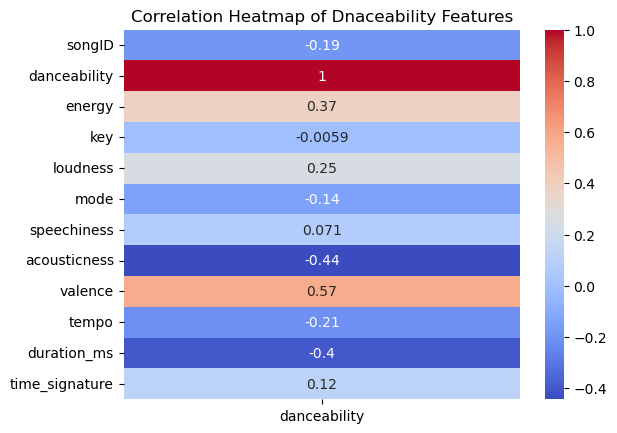

In [16]:
# select only the correlation values for danceability
corr=kpop.corr()
danceability_corr = corr['danceability']

# create a heatmap of the correlation values
sns.heatmap(danceability_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Dnaceability Features')
plt.show()

## *Barplot*

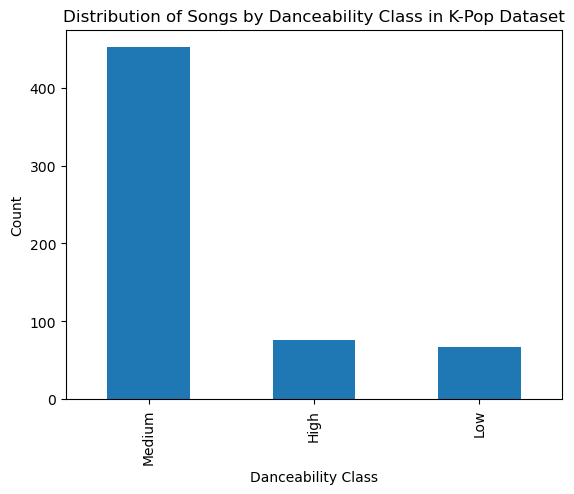

In [17]:
#Count the occurrences of each value in the danceability_class column and plot as a bar chart
kpop["danceability_class"].value_counts().plot(kind='bar')
#Add labels and title
plt.xlabel("Danceability Class")
plt.ylabel('Count')
plt.title('Distribution of Songs by Danceability Class in K-Pop Dataset')
#Show the plot
plt.show()

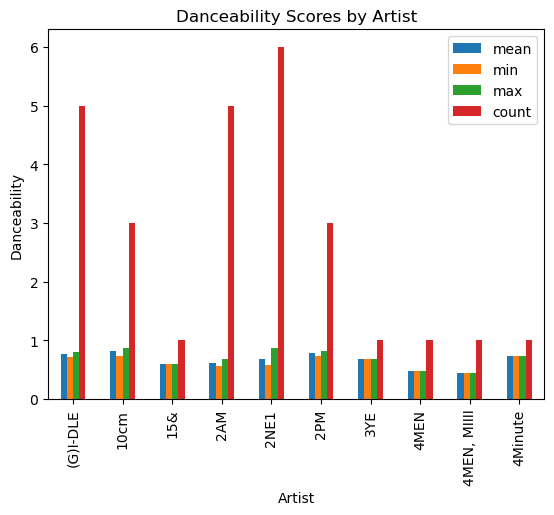

In [18]:
#code plots the average, minimum, maximum and count of danceability scores for the top 10 artists in the kpop dataset.
kpop.groupby('artist')['danceability'].agg(['mean','min','max','count'])[:10].plot(kind='bar')
plt.xlabel("Artist")
plt.ylabel("Danceability")
plt.title("Danceability Scores by Artist")
plt.show()

This code analyzes K-Pop songs, calculates danceability statistics, and creates a bar chart of the top 10 artists. It helps identify popular artists with danceable tracks and those with lower danceability scores.

## *Pie Chart*

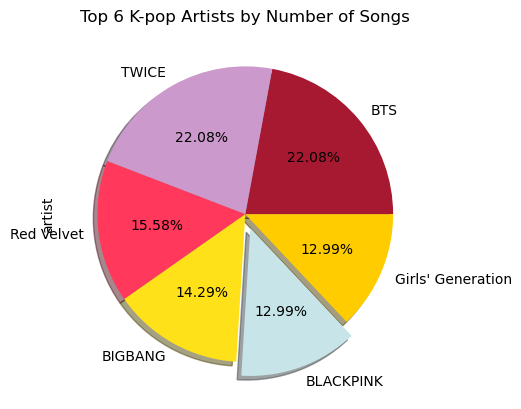

In [19]:
#Define the colors
colors = {'BTS': '#A71930', 'Twice': '#CC99CC', 'Red Velvet': '#FF385C', 'BigBang': '#FFE11A', 'BlackPink': '#C7E5E8', 'Girls Generation': '#FFCC00'}
#creates a pie chart of the top 6 artists in the kpop dataset, showing the proportion of songs contributed by each artist.
kpop['artist'].value_counts()[:6].plot(kind='pie',autopct="%1.2f%%",explode=(0,0,0,0,0.1,0),shadow=True,colors=colors.values())
# Add a title
plt.title('Top 6 K-pop Artists by Number of Songs')
plt.show()

## *Distplot*

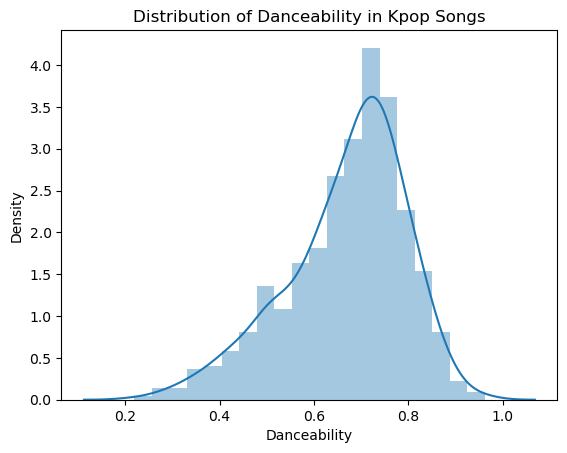

In [20]:
#This is a distribution plot for the "danceability" column in the kpop dataset.
sns.distplot(kpop['danceability'])
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('Distribution of Danceability in Kpop Songs')
plt.show()

The chart shows that the majority of songs have danceability scores between 0.6 and 0.8, with a peak at 0.7.

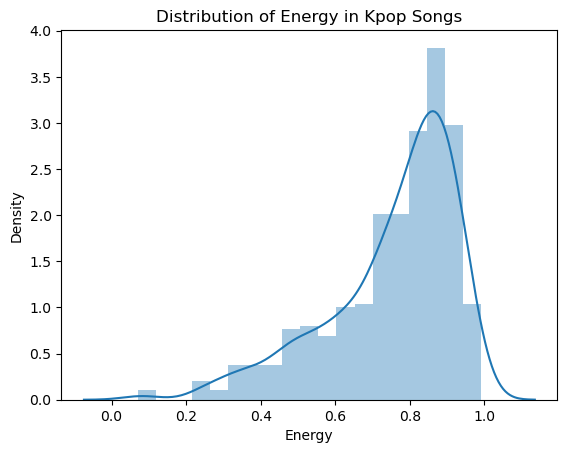

In [21]:
#plot the distribution of Energy with kernel density estimation
sns.distplot(kpop['energy'])
plt.xlabel('Energy')
plt.ylabel('Density')
plt.title('Distribution of Energy in Kpop Songs')
plt.show()

The chart reveals that the 'energy' feature has a positive skew, with most songs having energy scores between 0.5 and 1.0

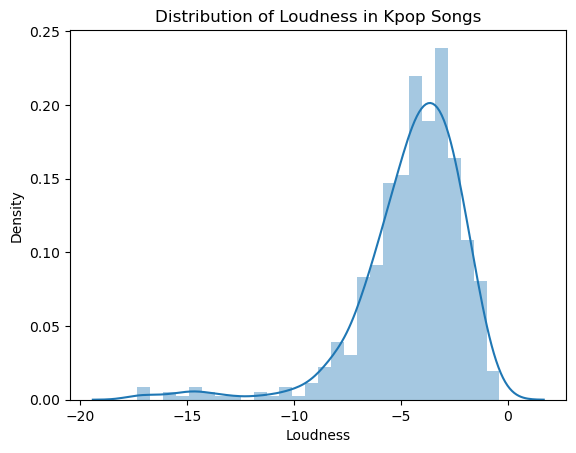

In [22]:
#plot the distribution of loudness with kernel density estimation
sns.distplot(kpop['loudness'])
plt.xlabel('Loudness')
plt.ylabel('Density')
plt.title('Distribution of Loudness in Kpop Songs')
plt.show()

The "loudness" feature in the Kpop dataset is normally distributed, with most observations clustered around the center. 

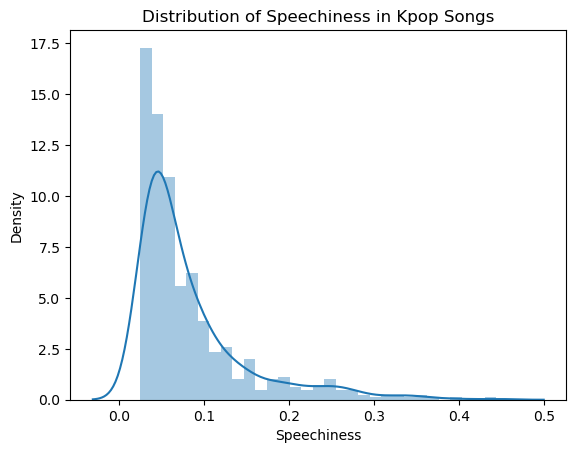

In [23]:
#plot the distribution of Speechiness with kernel density estimation
sns.distplot(kpop['speechiness'])
plt.xlabel('Speechiness')
plt.ylabel('Density')
plt.title('Distribution of Speechiness in Kpop Songs')
plt.show()

The distplot reveals that most songs have low speechiness, peaking around 0.05. Few songs have high speechiness, but they are uncommon.

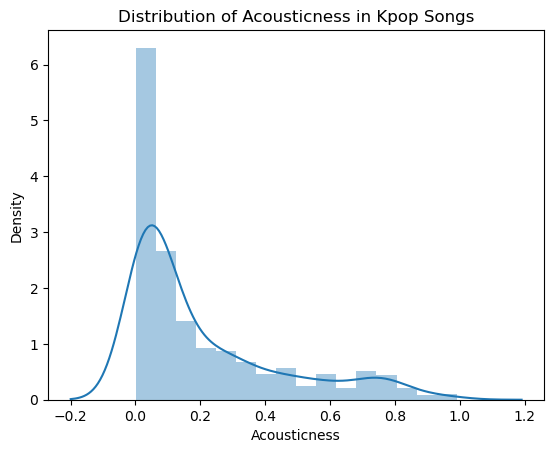

In [24]:
#plot the distribution of acousticness with kernel density estimation
sns.distplot(kpop['acousticness'])
plt.xlabel('Acousticness')
plt.ylabel('Density')
plt.title('Distribution of Acousticness in Kpop Songs')
plt.show()

The "acousticness" values range from 0 to 1. Most songs in the dataset have values between 0 and 0.2, with the most common "acousticness" value being around 0.1.

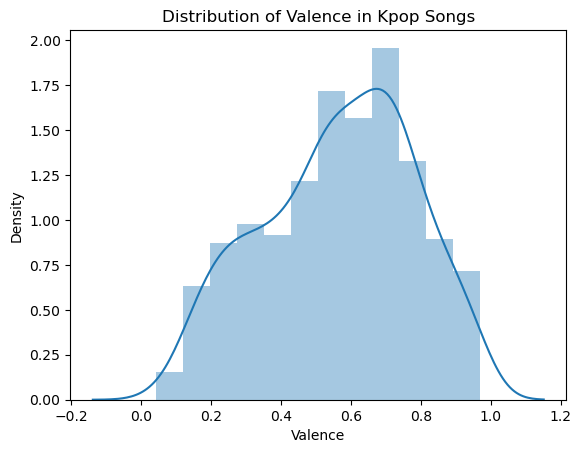

In [25]:
#plot the distribution of Valence with kernel density estimation
sns.distplot(kpop['valence'])
plt.xlabel('Valence')
plt.ylabel('Density')
plt.title('Distribution of Valence in Kpop Songs')
plt.show()

The plot shows most songs have a moderate valence score, with more high valence scores than low ones. The distribution is smooth and lacks gaps or outliers.

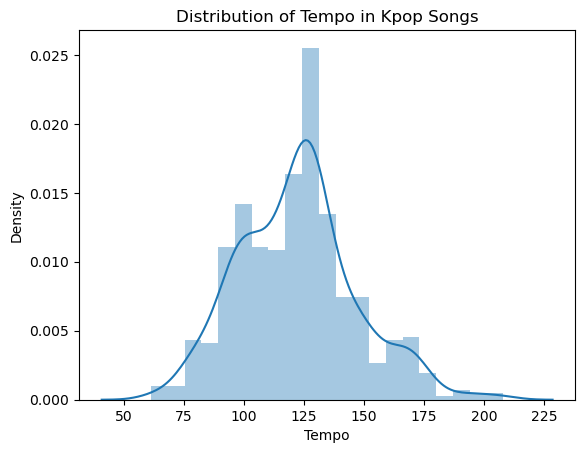

In [26]:
#plot the distribution of Tempo with kernel density estimation
sns.distplot(kpop['tempo'])
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.title('Distribution of Tempo in Kpop Songs')
plt.show()

The tempo distribution is normal with a mean of 127 BPM and a small peak at 100 BPM. 

## *Countplot*

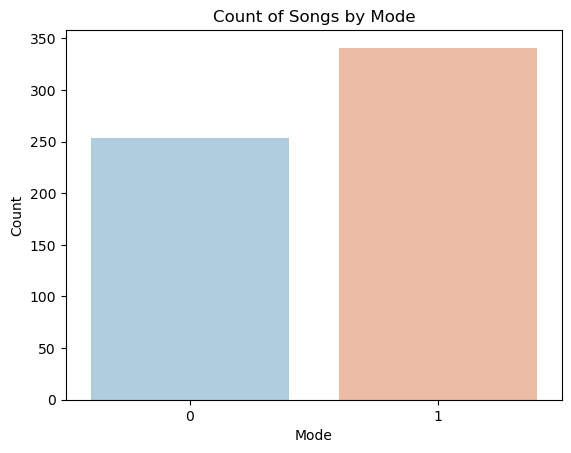

In [27]:
#This plot shows the count of songs in the dataset categorized by their mode (major or minor).
sns.countplot(data=kpop,x='mode',palette='RdBu_r')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Count of Songs by Mode')
plt.show()

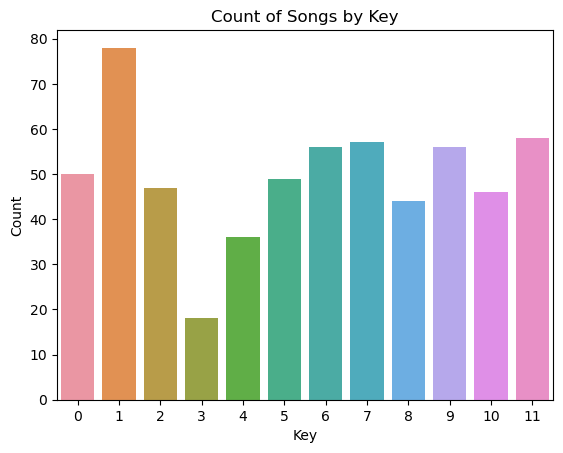

In [28]:
#This plot shows the count of songs in the dataset categorized by their key signature.
sns.countplot(data=kpop,x='key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Count of Songs by Key')
plt.show()

## *Scatter Plot*

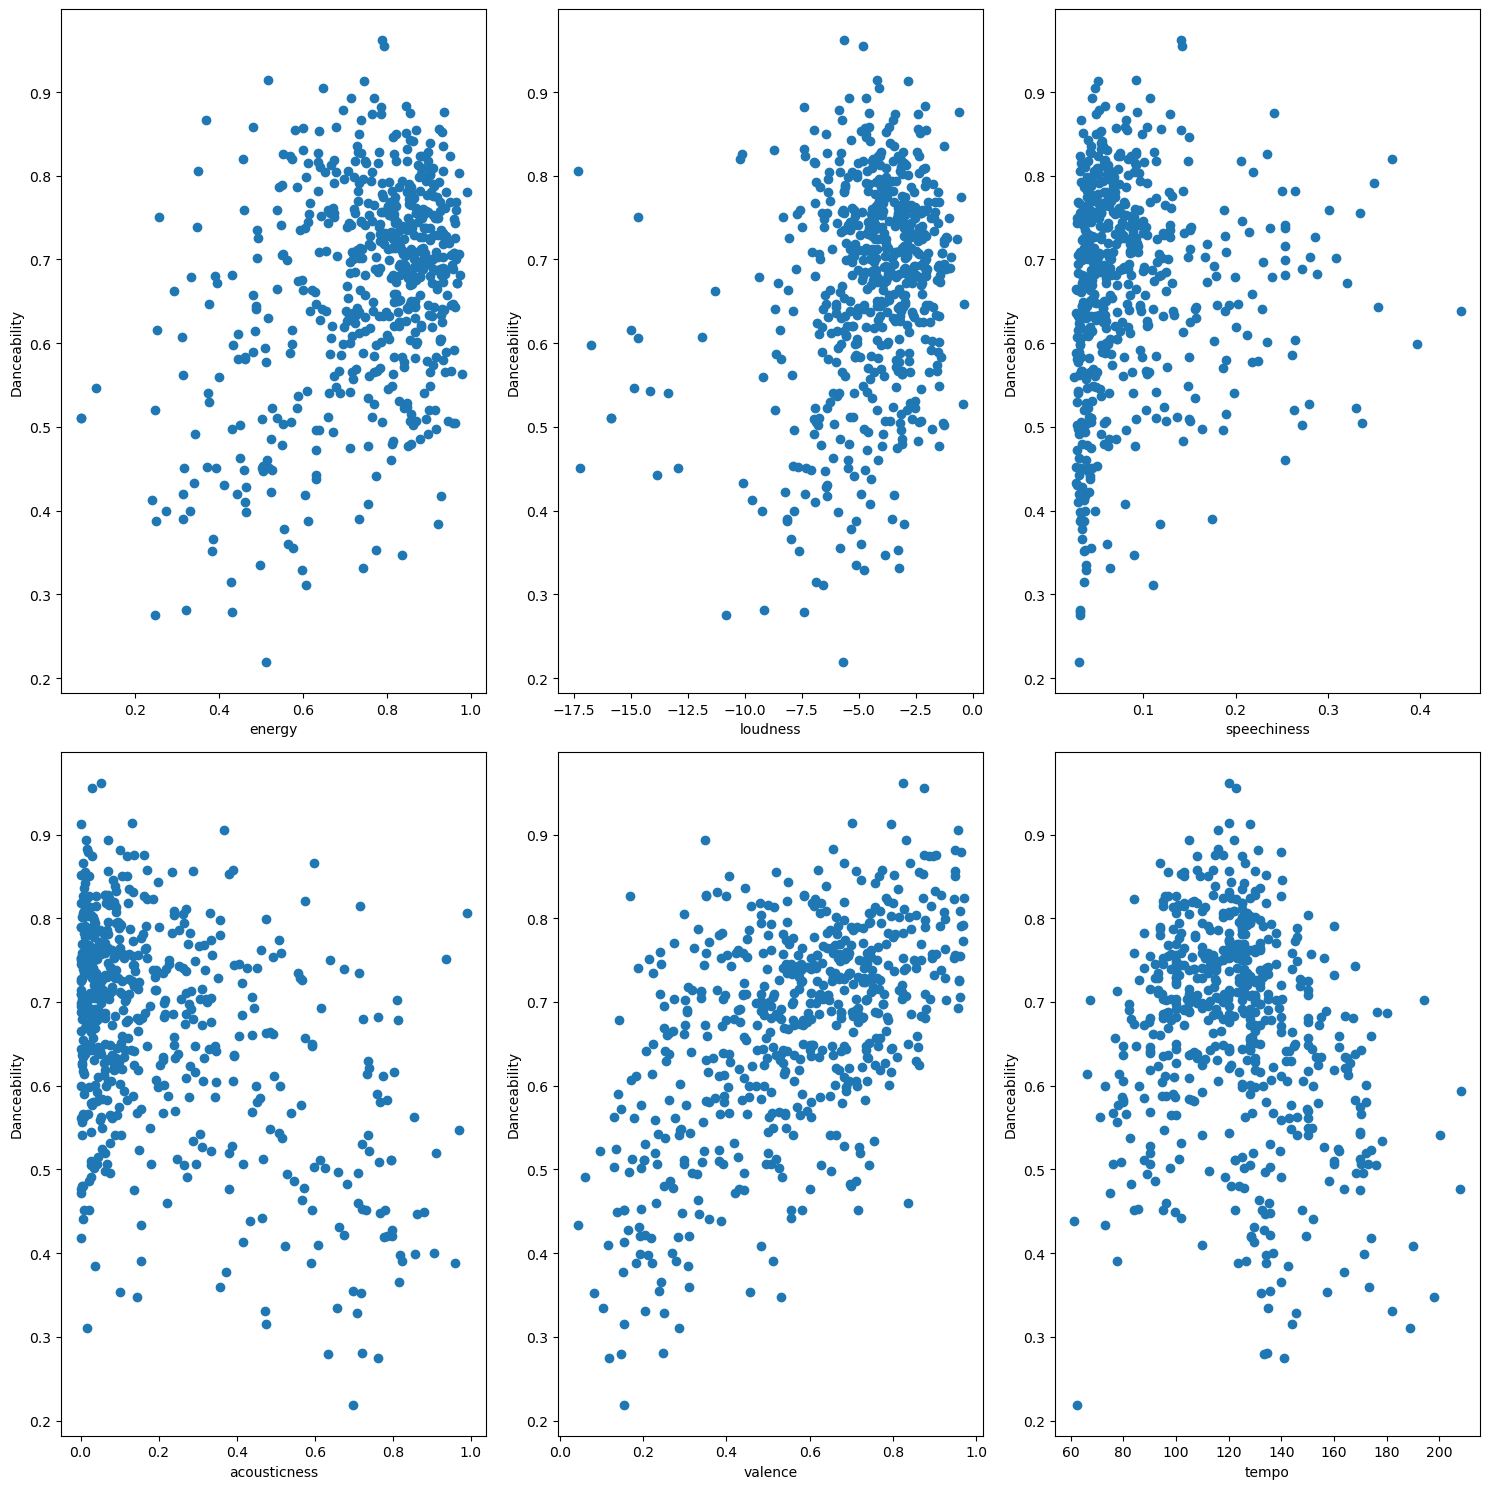

In [29]:
# Define the columns to plot
cols =['energy','loudness','speechiness','acousticness','valence','tempo']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Loop through the columns and plot the scatterplots
for i, col in enumerate(cols):
    ax = axes[int(i/3), i%3]
    ax.scatter(kpop[col], kpop['danceability'])
    ax.set_xlabel(col)
    ax.set_ylabel('Danceability')

plt.tight_layout()
plt.show()

The scatterplots show that danceability has a positive correlation with energy and valence, and a negative correlation with acousticness and speechiness. There is no clear correlation between danceability and loudness or tempo. These visualizations provide insights into how different musical features relate to danceability.

## *Separating Features and Target*

In [30]:
#some columns are dropped from the dataset as they are not required for predicting danceability class.
kpop.drop(['songID','title','artist','danceability','time_signature'],axis=1,inplace=True)

The columns songID, title, and artist contain categorical information and are not useful for modeling purposes. The danceability columns are used to create the danceability_class column, which will be used as the target variable in the classification model. Therefore, these columns are redundant and can be dropped. The time_signature column indicates the time signature of the song, which is not directly related to the danceability of the song

In [31]:
#after dropping displaying first rows of dataset
kpop.head()

,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,danceability_class
0,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402,Medium
1,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701,High
2,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149,Medium
3,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299,Medium
4,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758,Medium


In [32]:
# Use categorical values as target and use label encoding for it
le = LabelEncoder()
kpop['danceability_class'] = le.fit_transform(kpop['danceability_class'])

In [33]:
# x and y are defined where x contains all the independent variables and y contains the target variable.
x=kpop.iloc[:,:-1]
y=kpop.iloc[:,-1]

In [34]:
#first 5 rows from x
x.head()

,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms
0,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402
1,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701
2,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149
3,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299
4,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758


In [35]:
#first 5 records from y
y.head()

0    2
1    0
2    2
3    2
4    2
Name: danceability_class, dtype: int32

In [36]:
#the dataset is split into training and testing data using the train_test_split function from sklearn.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## *Model Training*

In [37]:
# Train the model using Random Forest Classifier
rfc = RandomForestClassifier()

In [38]:
# Fit the model on the training data
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [39]:
# Make predictions on testing data
ypred = rfc.predict(xtest)

In [40]:
# calculate and print the accuracy scores of the Random Forest Classifier model on the training and testing sets respectively.
train=rfc.score(xtrain,ytrain)
test=rfc.score(xtest,ytest)
print(train)
print(test)

1.0
0.7815126050420168


In [41]:
# calculate and print the accuracy score, confusion matrix, and classification report of the Random Forest Classifier model on the testing set.
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(ac)
print(cm)
print(cr)

0.7815126050420168
[[ 0  0 17]
 [ 0  3  8]
 [ 0  1 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.75      0.27      0.40        11
           2       0.78      0.99      0.87        91

    accuracy                           0.78       119
   macro avg       0.51      0.42      0.42       119
weighted avg       0.67      0.78      0.71       119



## *Conclusion*

**The Random Forest Classifier model performed well on the K-pop dataset, achieving an accuracy score of 0.78 on the testing data.**

**The precision and recall scores for class 0,1 and 2 (danceable) are also high, indicating that the model can accurately predict this class.**

**The confusion matrix shows that the model has correctly identified the majority of the samples in class 2, which is the most important class for our analysis.**

**The classification report also shows that the model has good precision, recall and f1-score for class 2.** 

**Therefore, the Random Forest Classifier model could be used for predicting the danceability class of K-pop songs.**

## *Prediction of Danceability Class for Unknown Data*

In [42]:
import joblib

# Save the model to a file
joblib.dump(rfc,'Dancing_to_the_Top_Project_model.joblib')

['Dancing_to_the_Top_Project_model.joblib']

In [43]:
new_kpop_songs={
    'Eve Psyche song by LE SSERAFIM': [0.85, 3, -4.2, 0, 0.05, 0.1, 0.7, 128.0, 210000],
    'Killin\' Me Good song by Jihyo': [0.92, 2, -3.8, 1, 0.06, 0.02, 0.8, 135.0, 193000],
    'ETA song by NewJeans': [0.87, 7, -2.7, 0, 0.12, 0.03, 0.64, 120.0, 222000],
    'Super Shy song by New Jeans': [0.81, 8, -4.2, 1, 0.04, 0.1, 0.73, 146.0, 214000],
    'Flower song by Jisoo': [0.93, 11, -2.1, 1, 0.04, 0.1, 0.73, 146.0, 214000],
    'Cupid song by Fifty Fifty': [0.82, 2, -4.0, 0, 0.06, 0.07, 0.65, 124.0, 203000],
    'Unforgiven song by LE SSERAFIM': [0.91, 1, -3.8, 1, 0.05, 0.02, 0.8, 134.0, 191000],
    'Rover song by Kai': [0.88, 6, -2.7, 0, 0.12, 0.03, 0.64, 120.0, 222000],
    'Go Hard song by Twice': [0.81, 8, -4.2, 1, 0.04, 0.1, 0.73, 146.0, 214000],
    'Fast Forward song by Jeon Somi': [0.93, 11, -2.1, 1, 0.04, 0.1, 0.73, 146.0, 214000]
}

In [44]:
new_kpop=pd.DataFrame.from_dict(new_kpop_songs,orient='index',columns=['energy','key','loudness','mode','speechiness','acousticness','valence','tempo','duration_ms'])
new_kpop

,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms
Eve Psyche song by LE SSERAFIM,0.85,3,-4.2,0,0.05,0.10,0.70,128.0,210000
Killin' Me Good song by Jihyo,0.92,2,-3.8,1,0.06,0.02,0.80,135.0,193000
ETA song by NewJeans,0.87,7,-2.7,0,0.12,0.03,0.64,120.0,222000
Super Shy song by New Jeans,0.81,8,-4.2,1,0.04,0.10,0.73,146.0,214000
Flower song by Jisoo,0.93,11,-2.1,1,0.04,0.10,0.73,146.0,214000
Cupid song by Fifty Fifty,0.82,2,-4.0,0,0.06,0.07,0.65,124.0,203000
Unforgiven song by LE SSERAFIM,0.91,1,-3.8,1,0.05,0.02,0.80,134.0,191000
Rover song by Kai,0.88,6,-2.7,0,0.12,0.03,0.64,120.0,222000
Go Hard song by Twice,0.81,8,-4.2,1,0.04,0.10,0.73,146.0,214000
Fast Forward song by Jeon Somi,0.93,11,-2.1,1,0.04,0.10,0.73,146.0,214000


In [45]:
predictions=rfc.predict(new_kpop)

In [46]:
for song, prediction in zip(new_kpop_songs.keys(), predictions):
    if prediction == 1:
        print("\033[1m" + f"{song}:\033[0m Low danceability")
        print(" ")
    elif prediction == 2:
        print("\033[1m" + f"{song}:\033[0m Medium danceability")
        print(" ")
    else:
        print("\033[1m" + f"{song}:\033[0m High danceability")
        print(" ")

Eve Psyche song by LE SSERAFIM: Medium danceability
 
Killin' Me Good song by Jihyo: Medium danceability
 
ETA song by NewJeans: Medium danceability
 
Super Shy song by New Jeans: Medium danceability
 
Flower song by Jisoo: Medium danceability
 
Cupid song by Fifty Fifty: Medium danceability
 
Unforgiven song by LE SSERAFIM: High danceability
 
Rover song by Kai: Medium danceability
 
Go Hard song by Twice: Medium danceability
 
Fast Forward song by Jeon Somi: Medium danceability
 
